In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [88]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_expression_evaluation/")

In [89]:
Ecd10LVM_DESeq2_results = "Results/Tables/Ecd10LVM_DESeq.dt.gene_biotypes.tsv"

In [90]:
Ecd10LVM_DESeq2_table = pd.read_csv(Ecd10LVM_DESeq2_results, sep="\t")
Ecd10LVM_DESeq2_table

,Name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_biotype
0,pdeL,2415.978960,3.704336,0.141971,26.092183,4.472174e-150,1.863108e-146,CDS
1,thrU,57935.413059,3.346408,0.152249,21.979872,4.487286e-107,9.347016e-104,tRNA
2,rcsA,408.220364,5.568988,0.315717,17.639182,1.232308e-69,1.711266e-66,CDS
3,zraP,312.472259,-4.719168,0.270512,-17.445302,3.737410e-68,3.892512e-65,CDS
4,ydeS,557.098582,4.052034,0.233933,17.321362,3.245836e-67,2.704431e-64,CDS
...,...,...,...,...,...,...,...,...
4421,yoaE,126.690472,0.000283,0.186664,0.001517,9.987899e-01,9.990297e-01,CDS
4422,yqfH,1.687275,0.001197,1.334938,0.000896,9.992847e-01,NaN,CDS
4423,flgK,12.743061,-0.000006,0.487415,-0.000013,9.999898e-01,9.999898e-01,CDS
4424,yefM,0.000000,NaN,NaN,NaN,NaN,NaN,CDS


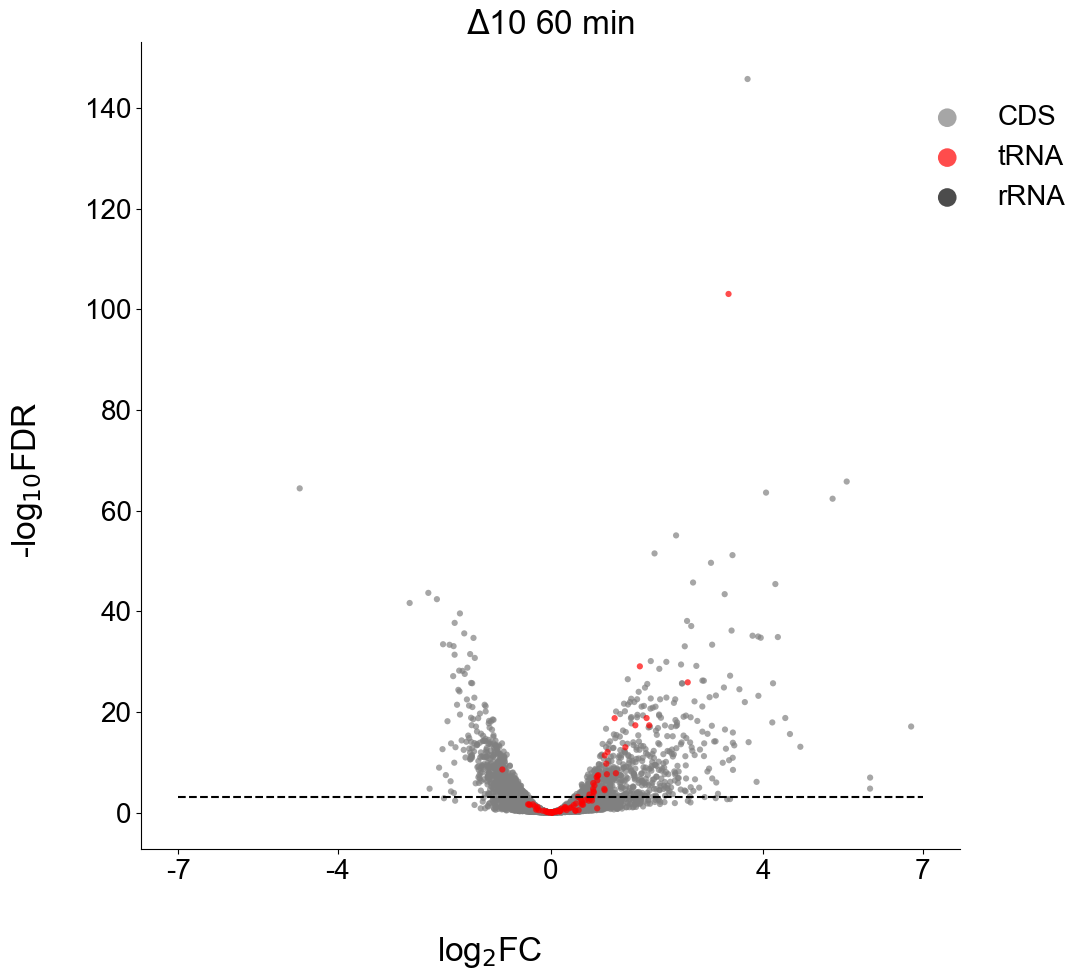

In [91]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20

figure = plt.figure(figsize=(10,10))
ax = plt.subplot()

colors_dict = {"CDS" : "grey", "tRNA" : "red", "rRNA" : "black"} 
dots_size=20
transparency=0.7

for feature in colors_dict.keys():
    feature_color = colors_dict[feature]
    
    ax.scatter(x = Ecd10LVM_DESeq2_table[Ecd10LVM_DESeq2_table.gene_biotype == feature]["log2FoldChange"], 
               y = -np.log10(Ecd10LVM_DESeq2_table[Ecd10LVM_DESeq2_table.gene_biotype == feature]["padj"]), 
               s = dots_size, 
               label = feature, 
               facecolors = "none", 
               edgecolors = "none", 
               alpha = transparency, 
               c = feature_color)
    
min_x = -round(max(abs(Ecd10LVM_DESeq2_table["log2FoldChange"])))
max_x = round(max(abs(Ecd10LVM_DESeq2_table["log2FoldChange"])))
    
ax.xaxis.set_ticks([min_x, -4, 0, 4, max_x])
ax.xaxis.set_ticklabels([min_x, -4, 0, 4, max_x])

ax.hlines(y = -np.log10(0.001), xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)

dots, labels = ax.get_legend_handles_labels()
figure.legend(dots, labels, loc="upper right", ncol=1, frameon=False, markerscale=3, bbox_to_anchor=(1.1, 0.9))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
    
ax.set_title("$\Delta$10 60 min")

figure.supxlabel("log$_2$FC")
figure.supylabel("-log$_{10}$FDR")

figure.align_labels()
figure.tight_layout()

In [92]:
figure.savefig("Results/Pictures/Ecd10LVM_DESeq2_matplotlib_version.png", dpi=300, bbox_inches="tight")

(array([2258.,  294.,  231.,  217.,  190.,  179.,  182.,  199.,  167.,
         249.]),
 array([1.86310754e-146, 9.99989807e-002, 1.99997961e-001, 2.99996942e-001,
        3.99995923e-001, 4.99994903e-001, 5.99993884e-001, 6.99992865e-001,
        7.99991846e-001, 8.99990826e-001, 9.99989807e-001]),
 <BarContainer object of 10 artists>)

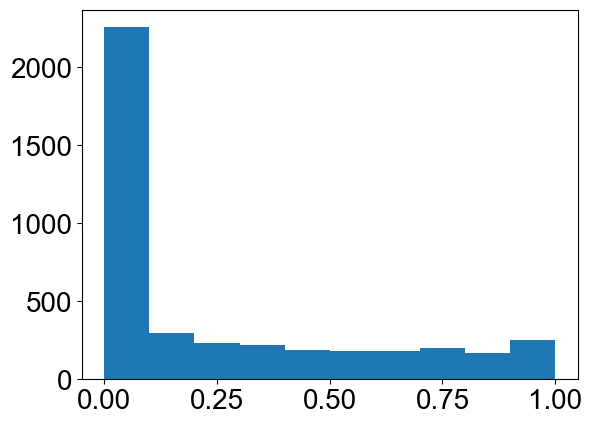

In [93]:
plt.hist(Ecd10LVM_DESeq2_table.padj)

In [94]:
Ecd10LVM_DESeq2_table.query("padj <= 0.01 and abs(log2FoldChange) >= 2")

,Name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_biotype
0,pdeL,2415.978960,3.704336,0.141971,26.092183,4.472174e-150,1.863108e-146,CDS
1,thrU,57935.413059,3.346408,0.152249,21.979872,4.487286e-107,9.347016e-104,tRNA
2,rcsA,408.220364,5.568988,0.315717,17.639182,1.232308e-69,1.711266e-66,CDS
3,zraP,312.472259,-4.719168,0.270512,-17.445302,3.737410e-68,3.892512e-65,CDS
4,ydeS,557.098582,4.052034,0.233933,17.321362,3.245836e-67,2.704431e-64,CDS
...,...,...,...,...,...,...,...,...
1410,yohP,13.075413,2.034574,0.622511,3.268334,1.081826e-03,3.194110e-03,CDS
1473,yiaN,7.379847,2.580984,0.819178,3.150700,1.628798e-03,4.603508e-03,CDS
1555,astA,8.736010,2.062941,0.686265,3.006042,2.646721e-03,7.090829e-03,CDS
1581,yddY,8.053298,2.141742,0.725231,2.953185,3.145139e-03,8.292816e-03,CDS
